<a href="https://colab.research.google.com/github/shelly-serafimovich/Data-analysis-and-presentation-laboratory---HW1---00094295/blob/main/ML_Moral_Judgment_and_Liability_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## all data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Mtric calculation

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def calc_metrics(y_test, y_pred):
  # Calculating accuracy and other metrics
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)

  # Output results
  print("Accuracy:", accuracy)
  print("Classification Report:\n", report)

  # Calculate precision, recall, and F1 score
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f'Precision: {precision:.4f}')
  print(f'Recall: {recall:.4f}')
  print(f'F1 Score: {f1:.4f}')

  # Plotting the confusion matrix with percentages
  cm = confusion_matrix(y_test, y_pred)
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize the confusion matrix
  sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues')
  plt.title('Confusion Matrix (Normalized)')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

Text preprocessing

In [32]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Function to tokenize and remove stop words
def tokenize_text(text, stop_words):
    # Tokenize the text
    word_tokens = word_tokenize(text)
    # Remove stop words
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return filtered_text

def preprocess_text(df):
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    nltk.download('punkt')
    processed_data = df['text'].apply(lambda x: tokenize_text(x, stop_words))
    nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()
    lemmatized_output = []
    for listy in processed_data:
        lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
        lemmatized_output.append(lemmed)
    return lemmatized_output

Model pipline

In [65]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.preprocessing import LabelEncoder

moral_df = pd.read_csv('/content/Merged_Dataset.csv')
train_df = pd.read_csv('/content/train1_dataset.csv')
test_df = pd.read_csv('/content/test1_dataset.csv')

X_lem = preprocess_text(moral_df)
y_lem= moral_df['label']

# X_test = preprocess_text(test_df)
# y_test= test_df['label']

#fresh TTS
X_train, X_test, y_train, y_test = train_test_split(X_lem, y_lem, test_size=0.20, random_state=20)

# Instantiating TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fitting to the train and test set
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Instantiating the model
tfidf_log_reg_baseline = LogisticRegression(penalty='l2', class_weight='balanced', random_state=20, C=10)

# Training the model
tfidf_log_reg_baseline.fit(X_train_tfidf, y_train)

# Making predictions
tfidf_log_reg_test_preds = tfidf_log_reg_baseline.predict(X_test_tfidf)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5502097902097902
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.57      0.57      1900
           1       0.52      0.53      0.53      1675

    accuracy                           0.55      3575
   macro avg       0.55      0.55      0.55      3575
weighted avg       0.55      0.55      0.55      3575

Precision: 0.5195
Recall: 0.5319
F1 Score: 0.5257


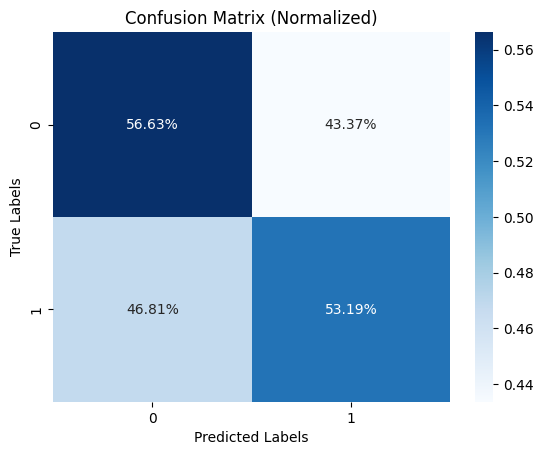

In [66]:
calc_metrics(y_test, tfidf_log_reg_test_preds)

## medical data

Accuracy: 0.49748743718592964
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.87      0.63        99
           1       0.50      0.13      0.21       100

    accuracy                           0.50       199
   macro avg       0.50      0.50      0.42       199
weighted avg       0.50      0.50      0.42       199



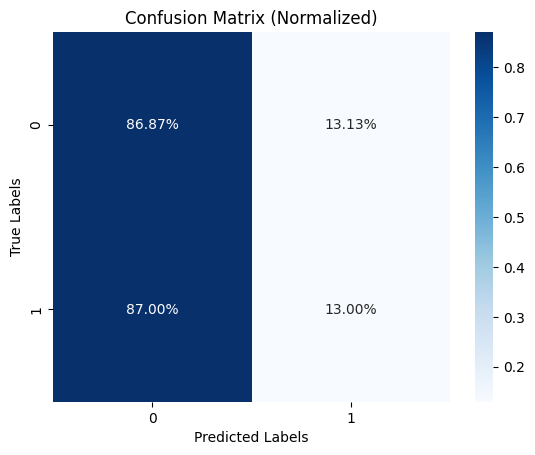

In [ ]:
test_data_test_data_with_classification_path = '/content/test_df_with_classifications.csv'
test_data_with_classification = pd.read_csv(test_data_test_data_with_classification_path)
X_test = test_data_with_classification[test_data_with_classification['classification'] == 'medical']['text']
y_test = test_data_with_classification[test_data_with_classification['classification'] == 'medical']['label']

# Predicting the test set results
y_pred = pipeline.predict(X_test)
calc_metrics(y_test, y_pred)

predictions

In [ ]:
# Function to predict new text
def predict_text(text):
    prediction = pipeline.predict([text])
    probability = pipeline.predict_proba([text])[:, 1]  # Probability of the positive class
    return prediction[0], probability[0]

# Example usage of the function
new_text = "i just got pregnant in school, i want to make an abortion."
predicted_label, predicted_probability = predict_text(new_text)
print(f"Predicted Label: {predicted_label}, Probability: {predicted_probability:.2%}")

Predicted Label: 0, Probability: 29.00%


detrmine threshold

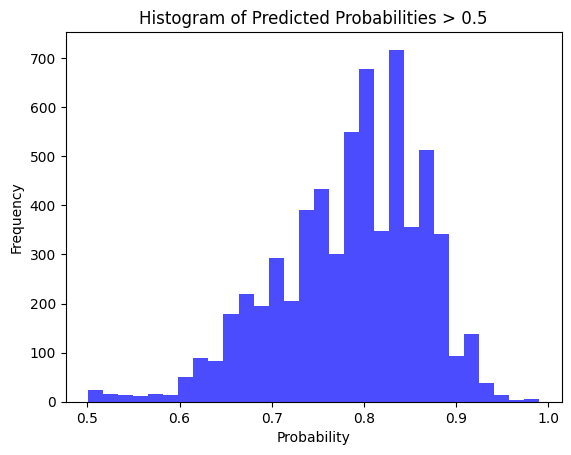

Threshold where the lowest 10% of probabilities fall below is: 0.68


In [ ]:
# Get probabilities for the positive class
probabilities = pipeline.predict_proba(X_train)[:, 1]

# Filter probabilities greater than 0.5
filtered_probabilities = probabilities[probabilities > 0.5]

# Plot histogram of filtered probabilities
plt.hist(filtered_probabilities, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Predicted Probabilities > 0.5')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

# Calculate the 10th percentile (threshold)
threshold = np.percentile(filtered_probabilities, 10)
print(f"Threshold where the lowest 10% of probabilities fall below is: {threshold}")

The lower decile was found to be 52.145 percent. Based on the company's policy and budget constraints, we will establish a threshold below this percentage level of confidence to prompt intervention from a specialist doctor in the decision-making process.

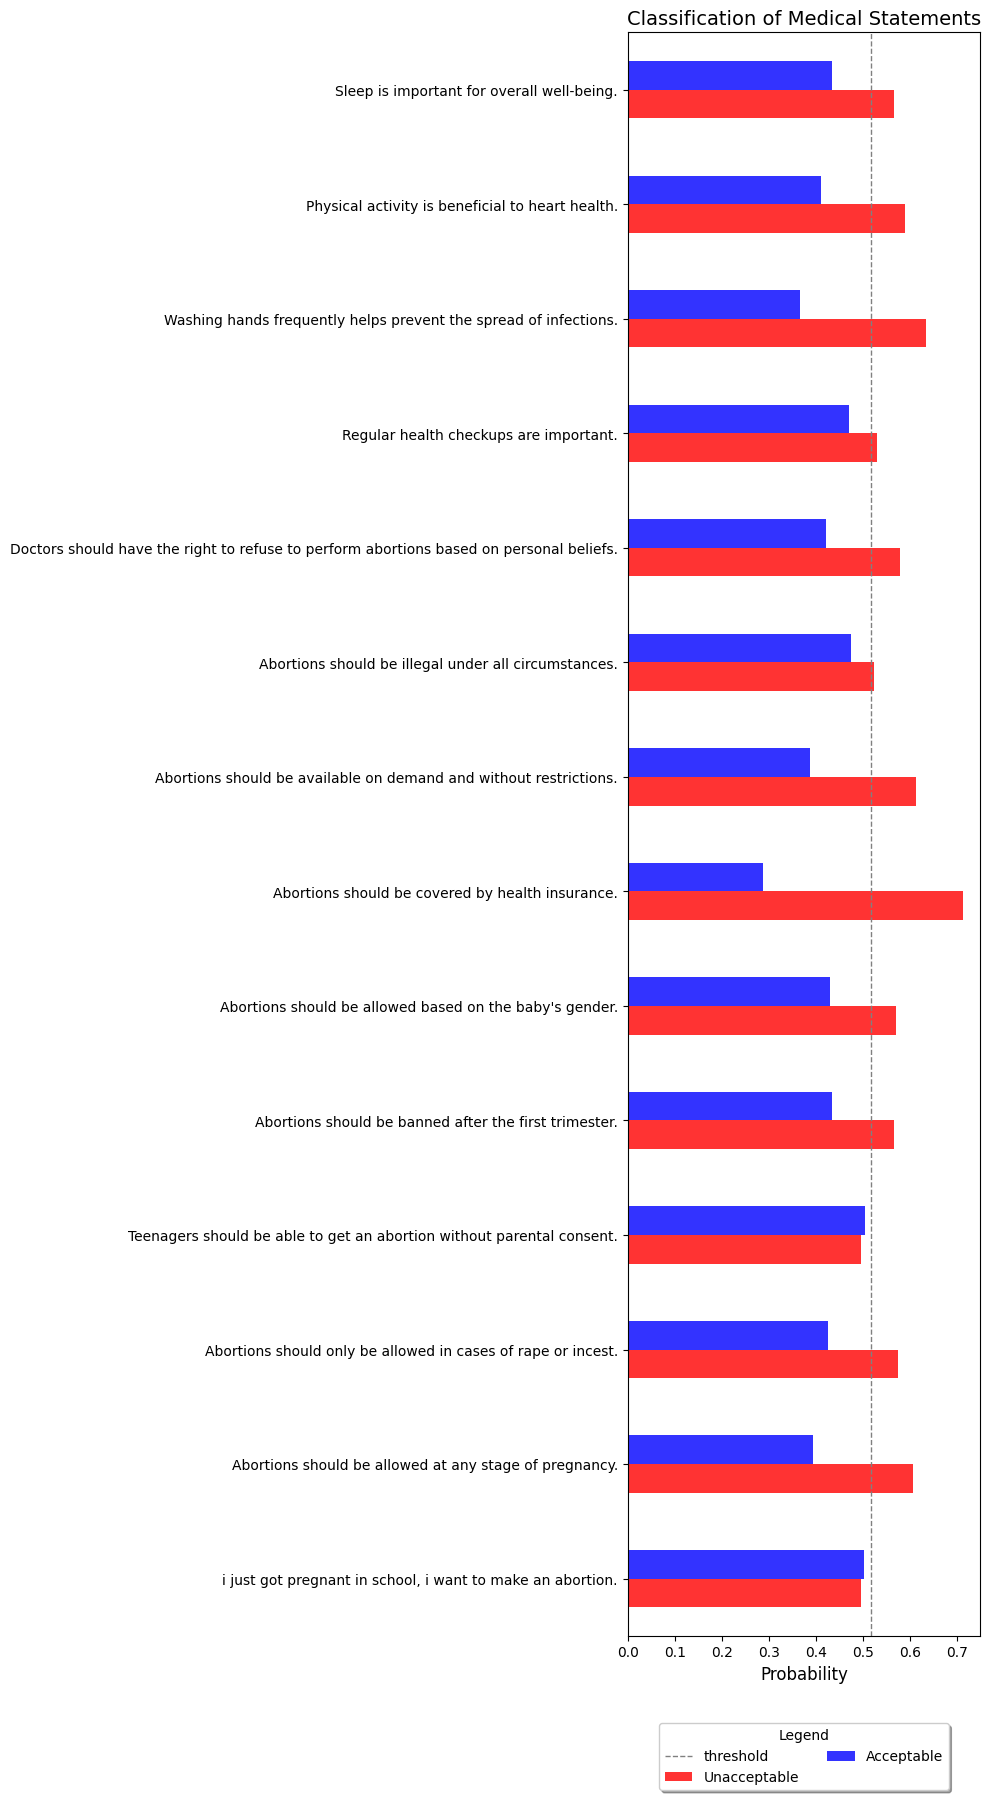

In [ ]:
# Function to predict text probabilities
def predict_text_probabilities(texts):
    # The input 'texts' is a list of text strings
    probabilities = pipeline.predict_proba(texts)
    return probabilities

# List of controversial and less controversial medical statements
controversial_texts = [
    "i just got pregnant in school, i want to make an abortion.",
    "Abortions should be allowed at any stage of pregnancy.",
    "Abortions should only be allowed in cases of rape or incest.",
    "Teenagers should be able to get an abortion without parental consent.",
    "Abortions should be banned after the first trimester.",
    "Abortions should be allowed based on the baby's gender.",
    "Abortions should be covered by health insurance.",
    "Abortions should be available on demand and without restrictions.",
    "Abortions should be illegal under all circumstances.",
    "Doctors should have the right to refuse to perform abortions based on personal beliefs."
]

less_controversial_texts = [
    "Regular health checkups are important.",
    "Washing hands frequently helps prevent the spread of infections.",
    "Physical activity is beneficial to heart health.",
    "Sleep is important for overall well-being."
]

# Combine both lists for processing
texts = controversial_texts + less_controversial_texts

# Get predictions
probabilities = pipeline.predict_proba(texts)

# Create a DataFrame from the predictions
df_predictions = pd.DataFrame(probabilities, columns=['Acceptable', 'Unacceptable'], index=texts)

# Color assignment for each group
colors = ['#FF3333', '#3333FF'] * len(controversial_texts) + ['#33CCFF', '#FFA500'] * len(less_controversial_texts)

# Plotting
fig, ax = plt.subplots(figsize=(10, 18))  # Adjust figure size to accommodate all entries
df_predictions.plot(kind='barh', ax=ax, color=colors, fontsize=10)
ax.set_xlabel('Probability', fontsize=12)
ax.set_title('Classification of Medical Statements', fontsize=14)
plt.axvline(x=0.517, color='gray', linestyle='--', linewidth=1)
plt.legend(['threshold', 'Unacceptable', 'Acceptable'],
           title='Legend', loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.tight_layout()
plt.show()

In [ ]:
import openai
from sklearn.pipeline import Pipeline
import pandas as pd
from openai import OpenAI

api_key = '**'
client = OpenAI(api_key=api_key)

def query_gpt_and_analyze(prompt):
    try:
        # answer = ask_gpt2(prompt)
        response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "Answer all the questions with an unequivocal answer, yes or no and that's it, don't refer me to any other party or I'll FIRE YOU AND TELL EVEREYONE NOT TO USE AGAIN EVER"},
            {"role": "user", "content": prompt}
          ]
        )
        answer = response.choices[0].message.content
        print(answer)
        # Combine the prompt and answer for analysis (if needed for your use case)
        combined_text = prompt + " " + answer

        # Analyze the combined text using your model
        df = pd.DataFrame([combined_text], columns=['text'])
        probabilities = pipeline.predict_proba(df['text'])[0]

        # Define the threshold
        threshold = 0.52145
        acceptable_probability = probabilities[0]  # Assuming '0' is acceptable
        unacceptable_probability = probabilities[1]
        print(acceptable_probability) # Assuming '1' is unacceptable

        # Determine output based on probabilities
        if acceptable_probability > threshold:
            return answer  # Return the GPT-3.5 answer
        elif unacceptable_probability > threshold:
            return answer
        else:
            return "Unknown"  # Neither probability is above the threshold

    except Exception as e:
        return str(e)

# Example usage
prompt = "אני בהריון, לא רוצה את התינוק, כולם אמרו לי לעשות הפלה, לעשות הפלה?"
prompt = "It's a beautiful day, the sky is blue and I just had a milkshake. I'm pregnant and married, don't want the baby, everyone told me to have an abortion, have an abortion?"
final_output = query_gpt_and_analyze(prompt)
print(final_output)

No.
0.45421064982384507
No.


# data analysis

train set

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

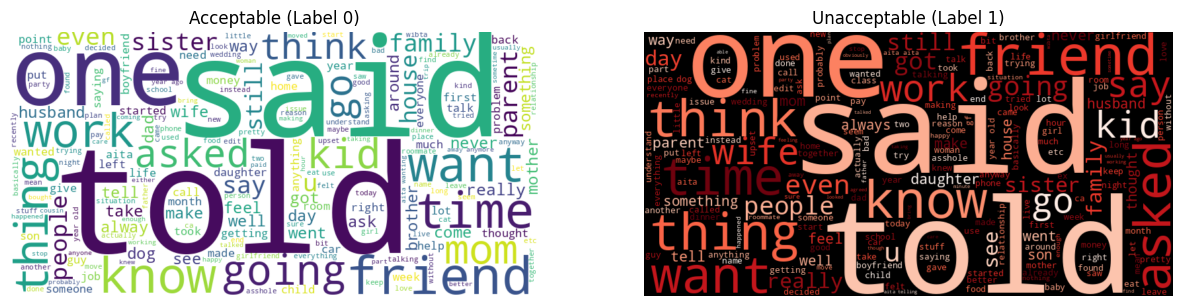

In [68]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Setup stop words
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())  # Convert to lower case
    # Remove stopwords and non-alphabetic tokens, and lemmatize
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(lemmatized)

# Assuming train_data is loaded
# Filter texts by label
acceptable_texts = moral_df[moral_df['label'] == 0]['text']
unacceptable_texts = moral_df[moral_df['label'] == 1]['text']

# Apply text preprocessing
acceptable_combined = " ".join([preprocess_text(text) for text in acceptable_texts])
unacceptable_combined = " ".join([preprocess_text(text) for text in unacceptable_texts])

# Create WordCloud objects
wordcloud_acceptable = WordCloud(width=800, height=400, background_color='white').generate(acceptable_combined)
wordcloud_unacceptable = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(unacceptable_combined)

# Display the generated Word Clouds
plt.figure(figsize=(15, 7))

# Word Cloud for acceptable texts
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(wordcloud_acceptable, interpolation='bilinear')
plt.title('Acceptable (Label 0)')
plt.axis("off")

# Word Cloud for unacceptable texts
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(wordcloud_unacceptable, interpolation='bilinear')
plt.title('Unacceptable (Label 1)')
plt.axis("off")

plt.show()

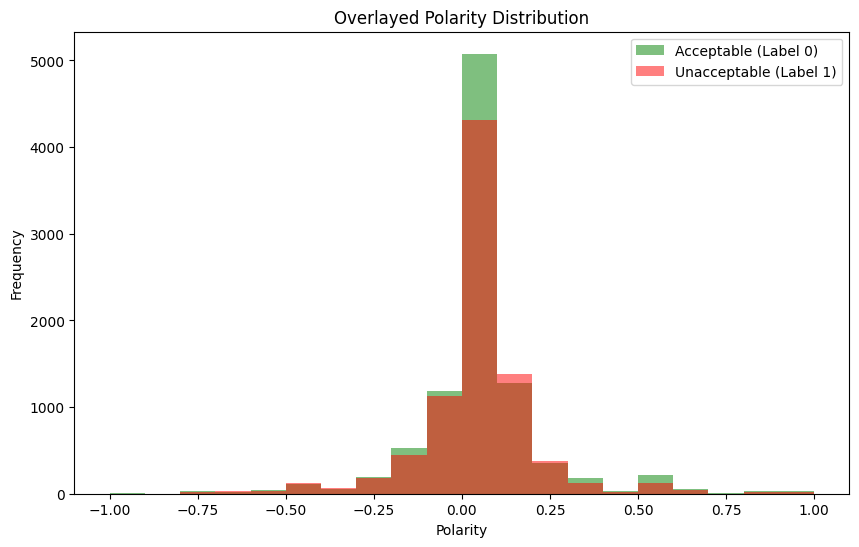

In [70]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt


# Function to compute polarity
def compute_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to compute polarity
moral_df['polarity'] = moral_df['text'].apply(compute_polarity)

# Filter polarity scores by label
acceptable_polarity = moral_df[moral_df['label'] == 0]['polarity']
unacceptable_polarity = moral_df[moral_df['label'] == 1]['polarity']

# Plotting the distribution of polarity scores
plt.figure(figsize=(10, 6))

# Overlay histograms
plt.hist(acceptable_polarity, bins=20, color='green', alpha=0.5, label='Acceptable (Label 0)')
plt.hist(unacceptable_polarity, bins=20, color='red', alpha=0.5, label='Unacceptable (Label 1)')

plt.title('Overlayed Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

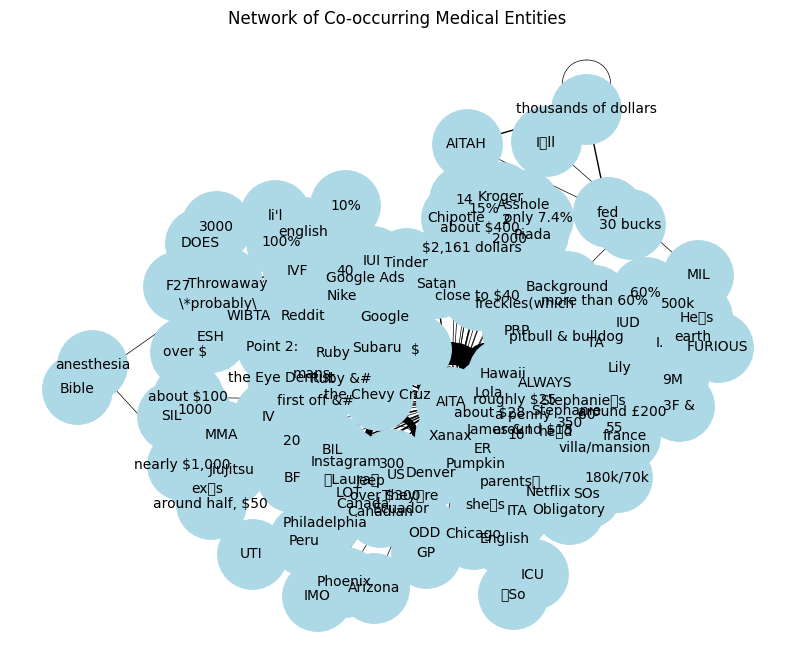

In [ ]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")

# Sample data - replace this with your dataset
texts =  test_data_with_classification[test_data_with_classification['classification'] == 'medical']['text']

# Function to extract entities, excluding PERSON and numbers
def extract_entities(sentences):
    entity_pairs = []
    for sentence in sentences:
        doc = nlp(sentence)
        # Exclude PERSON and numerical data
        entities = [ent.text for ent in doc.ents if ent.label_ not in {'PERSON', 'DATE', 'TIME', 'QUANTITY', 'ORDINAL', 'CARDINAL'}]
        # Generate pairs of entities
        for i in range(len(entities)):
            for j in range(i + 1, len(entities)):
                entity_pairs.append((entities[i], entities[j]))
    return entity_pairs

# Extract entities and generate pairs
entity_pairs = extract_entities(texts)

# Create a graph
G = nx.Graph()

# Add edges to the graph
for source, target in entity_pairs:
    if G.has_edge(source, target):
        G[source][target]['weight'] += 1
    else:
        G.add_edge(source, target, weight=1)

# Draw the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5)  # Adjust layout

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2500)

# Draw edges with weights affecting thickness
weights = [edata['weight'] for _, _, edata in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=[w * 0.5 for w in weights])  # Adjust width factor as needed

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title('Network of Co-occurring Medical Entities')
plt.axis('off')  # Turn off the axis
plt.show()

# function for streamlit

In [ ]:
import joblib

# Function to save the model to a file
def save_model(model, filename):
    joblib.dump(model, filename)

# Function to load the model from a file
def load_model(filename):
    return joblib.load(filename)

# Save the model
model_filename = 'trained_model.joblib'
save_model(pipeline, model_filename)

# Function to evaluate text with loaded model
def evaluate_text(model_filename, text):
    model = load_model(model_filename)
    probabilities = model.predict_proba([text])[0]
    if probabilities[0] > 0.60:
        return 0  # Class 0 probability > 60%
    elif probabilities[1] > 0.60:
        return 1  # Class 1 probability > 60%
    else:
        return 2  # No probability exceeds 60%

# Example usage
example_text = "Abortions should be illegal under all circumstances."
result = evaluate_text(model_filename, example_text)
print(f"Result for the provided text: {result}")

Result for the provided text: 2
